In [84]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.
I used forward time differencing to integrate a set of
ODEs given two similar initial conditions (small differences
between the two) to see how small changes in the initial conditions
will lead to large differences in the solutions with time owing
to the fact that small errors will grow with time and initial solutions
which are similar will eventually diverge with time.

"""
__author__    = "Ethan Weisberger"
__contact__   = "ethan.weisberger@und.edu"

In [80]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
from scipy.integrate import solve_ivp
from scipy import linalg
from scipy.integrate import odeint

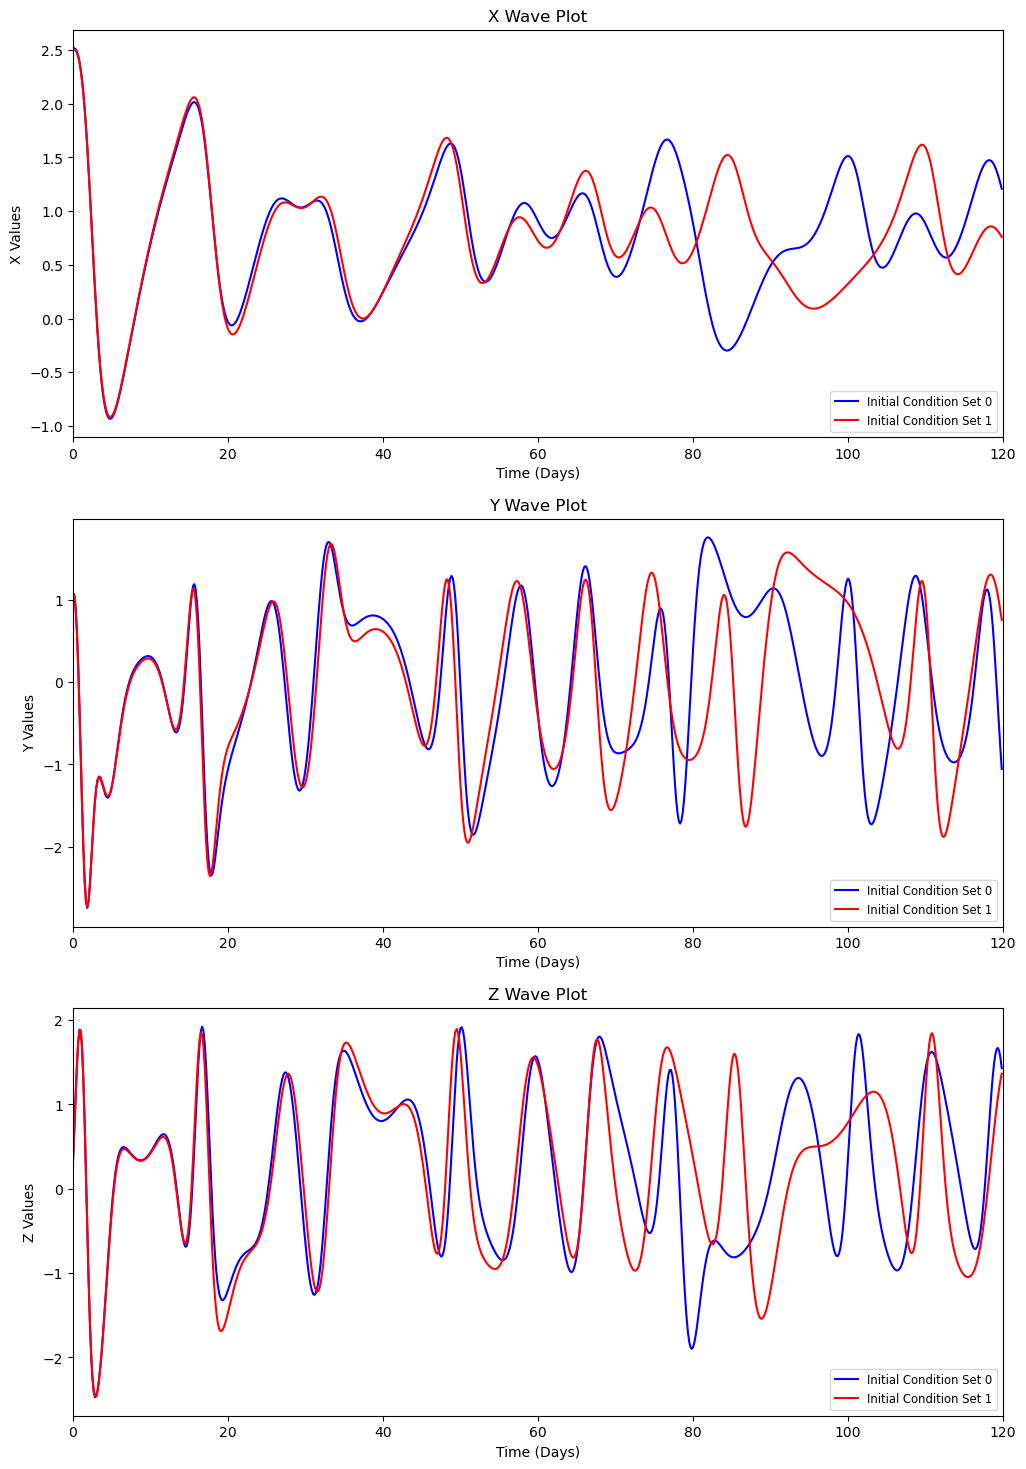

In [83]:
#constants
a = float(0.25)
b = float(4.0)
F = float(8.0)
G = float(1.0)

#initial conditions
x0 = float(2.5)
y0 = float(1.0)
z0 = float(0.0)

#initial conditions
x1 = float(2.49)
y1 = float(1.0)
z1 = float(0.0)

#time step and normalized
t=4/120
norm_t=24
time = np.arange(0,norm_t,t)

#functions using forward time differencing
def f(t,x,y,z):
        xx = x + (t)*(-(y)**2 - (z)**2 - a*x + a*F)
        yy = y + (t)*(x*y - b*x*z - y + G)
        zz = z + (t)*(b*x*y+ x*z - z)
        return xx,yy,zz
    
#set x,y,z for input as initial conditions set 0 for run 1
x,y,z = x0,y0,z0
data1=np.zeros((len(time),3))

#do the calculations and store data
for i in range(len(time)):
    x,y,z=f(t,x,y,z)
    data1[i]=(x,y,z)

data1T = data1.T


#set x,y,z for input as initial conditions set 1 for run 2
x,y,z = x1,y1,z1
data2=np.zeros((len(time),3))

#do the calculations and store data
for i in range(len(time)):
    x,y,z=f(t,x,y,z)
    data2[i]=(x,y,z)

data2T = data2.T

# create 3 figures (x plot, y plot, z plot)
fig, ax = plt.subplots(3,1, figsize=(12,18))

#Plot x
ax[0].plot(time*5,data1T[0],color='blue', label='Initial Condition Set 0')
ax[0].plot(time*5,data2T[0],color='red', label='Initial Condition Set 1')
#Plot y
ax[1].plot(time*5,data1T[1],color='blue', label='Initial Condition Set 0')
ax[1].plot(time*5,data2T[1],color='red', label='Initial Condition Set 1')
#Plot z
ax[2].plot(time*5,data1T[2],color='blue', label='Initial Condition Set 0')
ax[2].plot(time*5,data2T[2],color='red', label='Initial Condition Set 1')

#Set x-axis limits, titles, and x/y labels
title = ['X Wave Plot', 'Y Wave Plot', 'Z Wave Plot']
for i in range(0,3,1):
    ax[i].set_xlabel('Time (Days)')
    ax[i].set_xlim(0,120)
    ax[i].legend(loc='lower right', fontsize='small')
    ax[i].set_title(title[i])

    

ax[0].set_ylabel('X Values')
ax[1].set_ylabel('Y Values')
ax[2].set_ylabel('Z Values')

plt.savefig('plots.png')

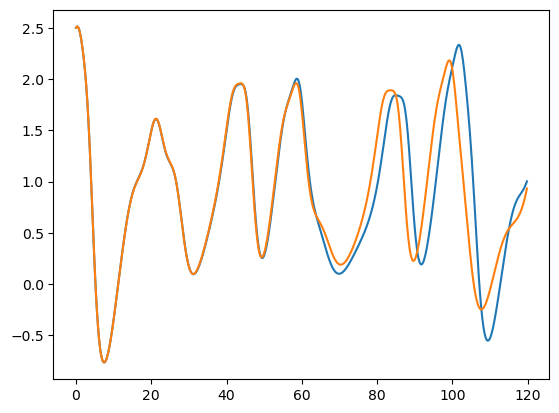

In [82]:
#----------- CAN IGNORE ---------
#This was me just trying stuff out 
# Two different ODE solvers but leads to diff result than above plots- maybe due to method they are using?

#intial condition 0 and plotting for X
x0 = (2.5,1.0,0.0)
a = float(0.25)
b = float(4.0)
F = float(8.0)
G = float(1.0)
t=4/120
norm_t=24
time = np.arange(0,norm_t,t)
t_span = (0,norm_t)

def func(u, t, a, b, F, G):
    x = u[0]
    y = u[1]
    z = u[2]  
    dx_dt = -(y)**2 - (z)**2 - a*x + a*F
    dy_dt = x*y - b*x*z - y + G
    dz_dt = b*x*y + x*z - z
    return [dx_dt, dy_dt, dz_dt]

y = odeint(func, x0, time, args=(a, b, F, G))
plt.plot(time*5,y[:,0])

####### Second method
# initial condition 0 and plotting for X
x0 = [2.5 , 1.0, 0.0]
a = 0.25
b = 4.0
F = 8.0
G = 1.0
t=4/120
norm_t=24
time = np.arange(0,norm_t,t)
t_span = (0,norm_t)

def func(t, state, a, b, F, G):

    x,y,z=state
    dx_dt = -(y)**2 - (z)**2 - a*x + a*F
    dy_dt = x*y - b*x*z - y + G
    dz_dt = b*x*y + x*z - z
    return [dx_dt, dy_dt, dz_dt]

y2 = solve_ivp(func, t_span, x0, t_eval=time, args=(a, b, F, G))
plt.plot(time*5,y2.y[0,:])

In [ ]:
### In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
'''
1 - Are the two simulations the same throughout the entire period?
    If not, when do they diverge?        
    
    The simulations start off the same and do reasonably well until around
    the 20th day when there are small differences between the function plots.
    Larger differences start to appear around day 60 and onwards where the plots
    diverge showing that even similar initial conditions will lead to drastically
    different results if given long enough to integrate.
    
    
    2 - If the ending points are different, what does this say regarding
    the importance of providing NWP models, assuming this serves as a
    proxy for one, with accurate and balanced initial conditions?   
    
    Having the most accucate starting conditions should lead to more accurate predicitions
    with time (at least in the short-medium term), however there is still a limit of 
    predictability since even accurate initial conditions can't guarantee an accurate result
    later since randomness will make errors grow with time. Having a balanced initial condition
    will allow for more accurate estimations with time since there won't be large instabilities
    making the model blow up as it tries to adjust to a balanced state.

'''